## Neural Network

### First we read and visualise the dataframe

In [1]:
import pandas as pd

input_df = pd.read_csv("Dataset4.csv",sep=";")

In [2]:
input_df.sample(n=5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
23617,55,services,married,secondary,no,879,no,no,cellular,28,aug,183,8,-1,0,unknown,no
8193,39,blue-collar,married,primary,no,2715,yes,no,unknown,2,jun,201,3,-1,0,unknown,no
20840,45,technician,divorced,tertiary,no,206,no,no,cellular,13,aug,376,4,-1,0,unknown,no
32830,58,blue-collar,married,secondary,no,221,yes,no,cellular,17,apr,115,2,343,2,failure,no
6736,27,services,single,secondary,no,3791,yes,no,unknown,28,may,231,1,-1,0,unknown,no


In [3]:
input_df = input_df.dropna(axis=0)  # there are not nan but it is good in general to check them

C:\Users\volpe\AppData\Local\Temp\ipykernel_21480\2253444957.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, count, f'({class_proportions[i]:.2%})', ha='center', va='bottom')


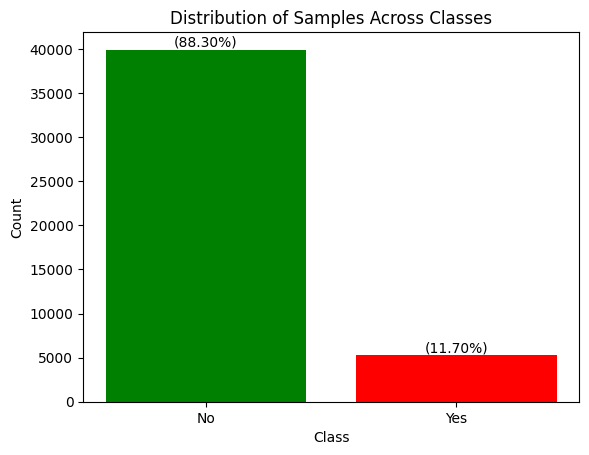

In [4]:
import matplotlib.pyplot as plt

# Assuming 'y' is the name of your target variable containing "yes" and "no" values

# Count the occurrences of each class
class_counts = input_df['y'].value_counts()

# Calculate proportions
total_samples = class_counts.sum()
class_proportions = class_counts / total_samples

# Plot the distribution
plt.bar(class_counts.index, class_counts.values, color=['green', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Samples Across Classes')
plt.xticks(class_counts.index, ['No', 'Yes'])  # Replace with appropriate labels

# Add text annotations for count and proportion
for i, count in enumerate(class_counts):
    plt.text(i, count, f'({class_proportions[i]:.2%})', ha='center', va='bottom')

plt.show()


### Now we preprocess the data

Now we have to find a numerical representation of the cathegorical variables.\
The default, housing, loan variables we use a binary representation.\
For the job and marital variables we use a one hot encoding.\
For the education variable we use an ordinal representation

Here we discretize the age variable

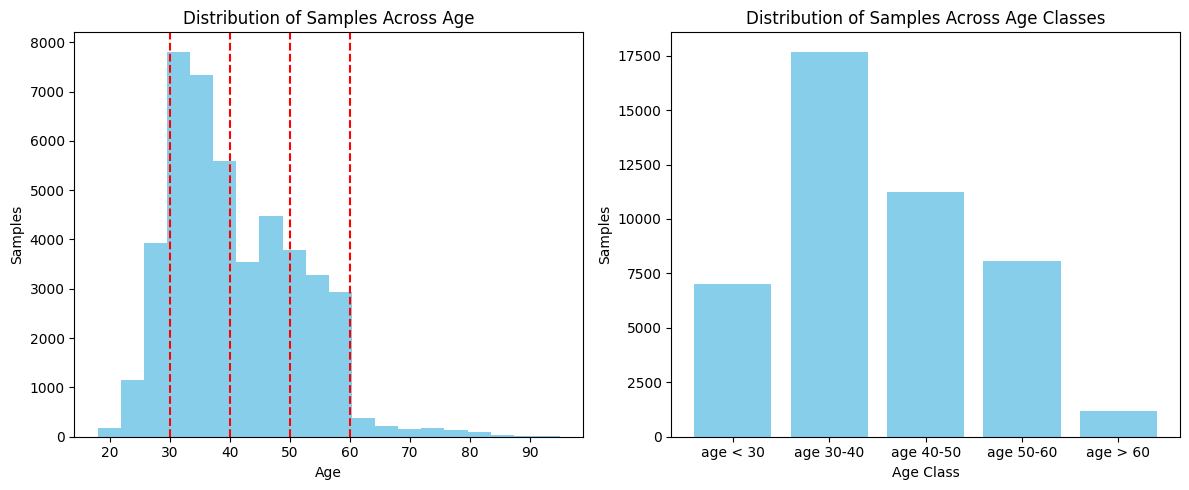

In [5]:
import matplotlib.pyplot as plt

# Define age thresholds
thresholds = [0, 30, 40, 50, 60, float('inf')]  # Add float('inf') to include ages greater than 60

# Create column for each class and populate with 0 or 1
input_df['age_class'] = pd.cut(input_df['age'], 
                               bins=thresholds, 
                               labels=["age < 30", "age 30-40", "age 40-50", "age 50-60", "age > 60"])

# Convert to dummy variables
age_dummies = pd.get_dummies(input_df['age_class'])

# Convert boolean values to integers (0 and 1)
age_dummies = age_dummies.astype(int)

# Concatenate dummy variables with the original DataFrame
input_df = pd.concat([input_df, age_dummies], axis=1)

# Calculate the count of samples in each age class
class_counts = input_df[['age < 30', 'age 30-40', 'age 40-50', 'age 50-60', 'age > 60']].sum()

#______________________________________________________ Plot

# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the distribution of samples across age
ages = input_df["age"].to_numpy()
axs[0].hist(ages, bins=20, color="skyblue")
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Samples')
axs[0].set_title('Distribution of Samples Across Age')

# Add threshold lines and class labels to the first plot
threshold = [30, 40, 50, 60]
classes = ["age < 30", "age 30-40", "age 40-50", "age 50-60", "age > 60"]
for value in threshold:
    axs[0].axvline(x=value, color='r', linestyle='--')

# Plotting the distribution of samples across age classes
class_counts = input_df[['age < 30', 'age 30-40', 'age 40-50', 'age 50-60', 'age > 60']].sum()
axs[1].bar(class_counts.index, class_counts.values, color='skyblue')
axs[1].set_xlabel('Age Class')
axs[1].set_ylabel('Samples')
axs[1].set_title('Distribution of Samples Across Age Classes')

# Show the plots
plt.tight_layout()
plt.show()

input_df.drop(columns=['age'], inplace=True)
input_df.drop(columns=['age_class'], inplace=True)


Here we discretize the balance variable

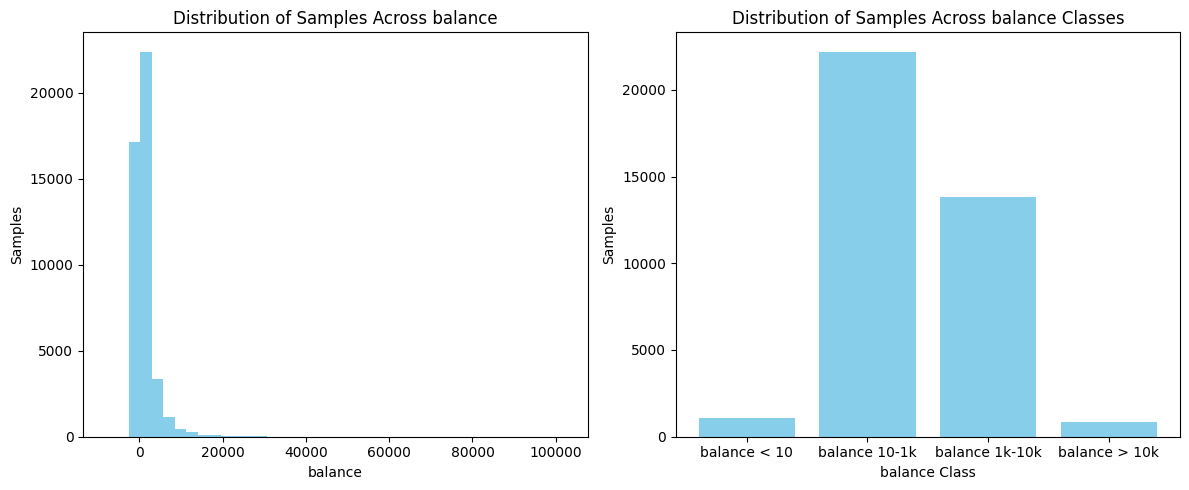

In [6]:

import matplotlib.pyplot as plt
# Define balance thresholds
thresholds = [0,10, 1000, 10000, float('inf')]  # Add float('inf') to include balances greater than 50


# Create column for each class and populate with 0 or 1
col = ["balance < 10", "balance 10-1k","balance 1k-10k", "balance > 10k"]
input_df['balance_class'] = pd.cut(input_df['balance'], 
                               bins=thresholds, 
                               labels=col)

# Convert to dummy variables
balance_dummies = pd.get_dummies(input_df['balance_class'])

# Convert boolean values to integers (0 and 1)
balance_dummies = balance_dummies.astype(int)

# Concatenate dummy variables with the original DataFrame
input_df = pd.concat([input_df, balance_dummies], axis=1)

# Calculate the count of samples in each balance class
class_counts = input_df[col].sum()

#______________________________________________________ Plot

# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the distribution of samples across balance
balances = input_df["balance"].to_numpy()
axs[0].hist(balances, bins=40, color="skyblue")
axs[0].set_xlabel('balance')
axs[0].set_ylabel('Samples')
axs[0].set_title('Distribution of Samples Across balance')



# Plotting the distribution of samples across balance classes
class_counts = input_df[col].sum()
axs[1].bar(class_counts.index, class_counts.values, color='skyblue')
axs[1].set_xlabel('balance Class')
axs[1].set_ylabel('Samples')
axs[1].set_title('Distribution of Samples Across balance Classes')

# Show the plots
plt.tight_layout()
plt.show()

input_df.drop(columns=['balance'], inplace=True)
input_df.drop(columns=['balance_class'], inplace=True)


Here we create dummies or binary encoding for the loan, housing, default, marital and job variable

In [7]:
# Define a mapping for 'yes' and 'no' to 1 and 0 respectively
mapping = {'yes': 1, 'no': 0}

# Apply mapping to the columns
input_df['loan']    = input_df['loan'].map(mapping)
input_df['housing'] = input_df['housing'].map(mapping)
input_df['default'] = input_df['default'].map(mapping)
input_df['y'] = input_df['y'].map(mapping)

In [8]:
#_______________________________________________________ Perform one-hot encoding on the 'marital' variable
marital_dummies = pd.get_dummies(input_df['marital'])

# Convert dummy variables to 0 and 1
marital_dummies = marital_dummies.astype(int)

# Concatenate the dummy variables with the original DataFrame
input_df = pd.concat([input_df, marital_dummies], axis=1)

# Drop the original 'marital' column if needed
input_df.drop(columns=['marital'], inplace=True)
#_______________________________________________________ Perform one-hot encoding on the 'job' variable
job_dummies = pd.get_dummies(input_df['job'])

# Convert dummy variables to 0 and 1
job_dummies = job_dummies.astype(int)

# Add prefix "job-" to each column name
job_dummies = job_dummies.add_prefix('job-')

# Concatenate the dummy variables with the original DataFrame
input_df = pd.concat([input_df, job_dummies], axis=1)

# Drop the original 'job' column if needed
input_df.drop(columns=['job'], inplace=True)

Here we encode the education, we assumed that people with unknown education are likely to have at least secondary education.
Reference: https://stats.stackexchange.com/questions/574761/what-is-this-one-hot-like-encoding-of-ordinal-variables-called-and-is-it-feasibl

In [9]:
# Define a function to map categories to binary vectors
def map_categories(category):
    if category == 'primary':
        return pd.Series([0, 0, 0])
    elif category == 'secondary':
        return pd.Series([1, 0, 0])
    elif category == 'unknown':
        return pd.Series([1, 1, 0])
    elif category == 'tertiary':
        return pd.Series([1, 1, 1])
    else:
        return None  # Handle unknown categories

# Apply the mapping function to the 'education' column and join the resulting Series to the DataFrame
input_df[['education_primary', 'education_secondary', 'education_tertiary']] = input_df['education'].apply(map_categories)

input_df.drop(columns='education', inplace=True)


Here we drop the last conctact day, cover the month to a number (assuming we are analasing the data in january the next year).\
Finally, we make a one hot encoding of the contact variable, dropping the variable unknown

In [10]:
# We drop the day of the month of the last contact
input_df.drop(columns='day', inplace=True)
#________________________________________________________________ Dummy rapresentation of months
# Perform one-hot encoding on the 'month' variable
month_dummies = pd.get_dummies(input_df['month'])

# Drop the dummy column for 'jan' if it exists
if 'jan' in month_dummies.columns:
    month_dummies.drop(columns='jan', inplace=True)

# Convert remaining dummy variables to 0 and 1
month_dummies = month_dummies.astype(int)

# Rename columns to include prefix 'month_'
month_dummies.columns = ['month_' + col for col in month_dummies.columns]

# Concatenate the dummy variables with the original DataFrame
input_df = pd.concat([input_df, month_dummies], axis=1)

# Drop the original 'month' column
input_df.drop(columns=['month'], inplace=True)

#________________________________________________________________ Dummy rapresentation of contact
# Perform one-hot encoding on the 'contact' variable
contact_dummies = pd.get_dummies(input_df['contact'])

# Drop the 'unknown' dummy column if it exists
if 'unknown' in contact_dummies.columns:
    contact_dummies.drop(columns='unknown', inplace=True)

# Convert remaining dummy variables to 0 and 1
contact_dummies = contact_dummies.astype(int)

# Rename columns to include prefix 'contact_'
contact_dummies.columns = ['contact_' + col for col in contact_dummies.columns]

# Concatenate the dummy variables with the original DataFrame
input_df = pd.concat([input_df, contact_dummies], axis=1)

# Drop the original 'contact' column
input_df.drop(columns=['contact'], inplace=True)


Here we encode the poutcome variable

In [11]:
# Perform one-hot encoding on the 'poutcome' variable
poutcome_dummies = pd.get_dummies(input_df['poutcome'])

# Convert remaining dummy variables to 0 and 1
poutcome_dummies = poutcome_dummies.astype(int)

# Rename columns to include prefix 'poutcome_'
poutcome_dummies.columns = ['poutcome_' + col for col in poutcome_dummies.columns]

# Concatenate the dummy variables with the original DataFrame
input_df = pd.concat([input_df, poutcome_dummies], axis=1)

# Drop the original 'poutcome' column
input_df.drop(columns=['poutcome'], inplace=True)

# Drop the original 'poutcome_unknown' column
input_df.drop(columns=['poutcome_unknown'], inplace=True)


Now we visualize the dataset

In [12]:
input_df.iloc[:,0:10].sample(n=10)


,default,housing,loan,duration,campaign,pdays,previous,y,age < 30,age 30-40
26967,0,0,0,714,1,-1,0,0,0,0
33162,0,1,0,143,2,-1,0,0,0,1
33673,0,1,0,6,6,328,8,0,0,1
21570,0,0,0,332,2,-1,0,0,0,1
13490,0,1,1,112,1,-1,0,0,0,0
34756,0,1,0,207,1,351,2,0,0,1
32938,0,1,0,186,2,-1,0,0,1,0
13771,0,1,0,181,1,-1,0,0,0,1
28463,0,0,0,126,1,-1,0,0,0,0
20027,0,1,0,889,2,-1,0,0,0,0


In [13]:
input_df.iloc[:,10:20].sample(n=10)


,age 40-50,age 50-60,age > 60,balance < 10,balance 10-1k,balance 1k-10k,balance > 10k,divorced,married,single
42981,0,0,0,0,0,1,0,1,0,0
21294,0,0,0,1,0,0,0,0,1,0
30310,1,0,0,0,1,0,0,0,0,1
32264,0,0,0,0,1,0,0,0,0,1
44578,0,0,0,0,0,0,0,0,1,0
42123,0,0,0,0,0,1,0,0,1,0
37557,0,0,0,0,1,0,0,0,1,0
1426,0,0,0,0,1,0,0,0,1,0
23774,1,0,0,0,1,0,0,0,1,0
19561,0,1,0,0,1,0,0,0,1,0


In [14]:
input_df.iloc[:,20:30].sample(n=10)

,job-admin.,job-blue-collar,job-entrepreneur,job-housemaid,job-management,job-retired,job-self-employed,job-services,job-student,job-technician
24034,0,0,0,0,1,0,0,0,0,0
22565,0,0,0,0,0,0,0,0,0,1
17622,0,0,0,0,0,0,0,0,0,0
18100,1,0,0,0,0,0,0,0,0,0
11367,0,0,0,0,1,0,0,0,0,0
43726,0,0,0,0,1,0,0,0,0,0
22708,0,0,0,0,0,0,0,0,0,1
2839,0,0,0,0,0,0,0,0,0,1
23514,0,0,0,0,1,0,0,0,0,0
2774,1,0,0,0,0,0,0,0,0,0


In [15]:
input_df.iloc[:,30:40].sample(n=10)

,job-unemployed,job-unknown,education_primary,education_secondary,education_tertiary,month_apr,month_aug,month_dec,month_feb,month_jul
42500,0,0,1,1,1,0,0,1,0,0
8336,0,0,1,0,0,0,0,0,0,0
11905,1,0,1,0,0,0,0,0,0,0
26982,0,0,0,0,0,0,0,0,0,0
9040,0,0,0,0,0,0,0,0,0,0
3341,0,0,0,0,0,0,0,0,0,0
30572,0,0,1,0,0,0,0,0,1,0
37029,0,0,0,0,0,0,0,0,0,0
36349,0,0,1,0,0,0,0,0,0,0
9617,0,0,1,0,0,0,0,0,0,0


In [16]:
input_df.iloc[:,40:].sample(n=10)

,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
20556,0,0,0,0,0,0,1,0,0,0,0
36840,0,0,1,0,0,0,1,0,1,0,0
20559,0,0,0,0,0,0,1,0,0,0,0
33941,0,0,0,0,0,0,1,0,1,0,0
42392,0,0,0,0,0,0,1,0,0,0,0
33803,0,0,0,0,0,0,1,0,0,0,0
13959,0,0,0,0,0,0,1,0,0,0,0
42836,0,0,0,0,0,0,1,0,1,0,0
28605,0,0,0,0,0,0,1,0,0,0,0
7315,0,0,1,0,0,0,0,0,0,0,0


### Neural Network

In [17]:
from sklearn.model_selection import train_test_split

X = input_df.drop(columns=['y']).to_numpy()
Y = input_df["y"].to_numpy()

x_train, x_val, y_train, y_val = train_test_split( X, Y, test_size=0.20, random_state=42)
#x_train, x_val, y_train, y_val = train_test_split( x_train, y_train, test_size=0.20, random_state=42)

In [18]:
x_train[0,:]

array([ 0,  1,  0, 72,  1, -1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,
        1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

Now we create some architechtures and choose the one with the highest accuracy

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_m0(epo,bat,c,x,y):
    model = Sequential([
    Dense(100, activation='relu', input_dim=c), # Input layer
    Dense(100, activation='tanh'),                               # Hidden layer
    Dense(100, activation='relu'),                               # Hidden layer
    Dense(1, activation='sigmoid')                              # Output layer
    ])
    model.compile(loss='binary_crossentropy',  
                  metrics=['accuracy'],
                  optimizer = "adam")
    model.fit(x,y,epochs=epo,batch_size=bat,verbose=0)
    return model

def create_m1(epo,bat,c,x,y):
    model=Sequential()
    model.add(Dense(units=30, activation='relu', input_dim=c))
    model.add(Dense(units=100, activation='tanh'))
    model.add(Dense(units=1, activation='sigmoid'))    #output layer
    model.compile(loss='binary_crossentropy',  
                  metrics=['accuracy'],                                    # tf.keras.losses.CategoricalCrossentropy should be more appropriate but I cannot make it work
                  optimizer = "adam")
    model.fit(x,y,epochs=epo,batch_size=bat,verbose=0)
    return model
def create_m2(epo,bat,c,x,y):
    model=Sequential()
    model.add(Dense(units=30, activation='relu', input_dim=c))
    model.add(Dense(units=1, activation='sigmoid'))    #output layer
    model.compile(loss='binary_crossentropy',  
                  metrics=['accuracy'],
                  optimizer = "adam")
    model.fit(x,y,epochs=epo,batch_size=bat,verbose=0)
    return model

def create_m3(epo,bat,c,x,y):
    model=Sequential()
    model.add(Dense(units=300, activation='relu', input_dim=c))
    model.add(Dense(units=1, activation='sigmoid'))    #output layer
    model.compile(loss='binary_crossentropy',  
                  metrics=['accuracy'],
                  optimizer = "adam")
    model.fit(x,y,epochs=epo,batch_size=bat,verbose=0)
    return model
def create_m4(epo,bat,c,x,y):
    model=Sequential()
    model.add(Dense(units=1000, activation='relu', input_dim=c))
    model.add(Dense(units=1, activation='sigmoid'))    #output layer
    model.compile(loss='binary_crossentropy',  
                  metrics=['accuracy'],
                  optimizer = "adam")
    model.fit(x,y,epochs=epo,batch_size=bat,verbose=0)
    return model

Since the accuracy is not suitable for this task we select the neural network that shows the highest precision in predicting class 1 (subscription)

In [20]:
# Maximise accuracy
from sklearn.metrics import precision_score

fun_lst =  [create_m0,create_m1,create_m2,create_m3,create_m4]

epo_list = [1,3, 5,20]


batch_size_list = [5,8,10]
best_performance = -1
c = x_train.shape[1]
# 80 models will be trained
for function in fun_lst:
    for epo in epo_list:
        for bat in batch_size_list:
            model = function(epo,bat,c,x_train, y_train)
            val_loss, val_accuracy = model.evaluate(x_val, y_val)
            if val_accuracy > best_performance:
                best_performance = val_accuracy
                opt_model, opt_fun, opt_epo, opt_bat = model, function, epo, bat

                
'''
Best performance: 
0.9022670984268188
Optimal model: 
<function create_m4 at 0x000002D4762453A0>
Optimal number of epoch: 
20
Optimal batch size: 
8
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step
'''

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.8924 - loss: 0.2350
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.8971 - loss: 0.2432
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.8891 - loss: 0.2399
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.7837 - loss: 0.8261
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.7161 - loss: 1.2750
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.8918 - loss: 0.2994
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.8938 - loss: 0.2604
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.8894 - loss: 0.2828
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.8947 - loss: 0.2613
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.8942 - loss: 0.2473
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.8959 - loss: 0.2534
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.8946 - loss: 0.2551
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.8973 - loss: 0.2416

'\nBest performance: \n0.9022670984268188\nOptimal model: \n<function create_m4 at 0x000002D4762453A0>\nOptimal number of epoch: \n20\nOptimal batch size: \n8\n227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step\n'

In [21]:
'''
'''
print("Best performance: ",best_performance,\
      "Optimal model: ",opt_fun, \
      "Optimal number of epoch: ",opt_epo,\
      "Optimal batch size: ", opt_bat,sep="\n")
predictions = opt_model.predict(x_val)

Best performance: 
0.9016919136047363
Optimal model: 
<function create_m3 at 0x000001BCC0B81E40>
Optimal number of epoch: 
20
Optimal batch size: 
5
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step


In [22]:
# to save time (epo,bat,c,x,y
#opt_model = create_m4(20,8,x_train.shape[1],x_train, y_train)

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step


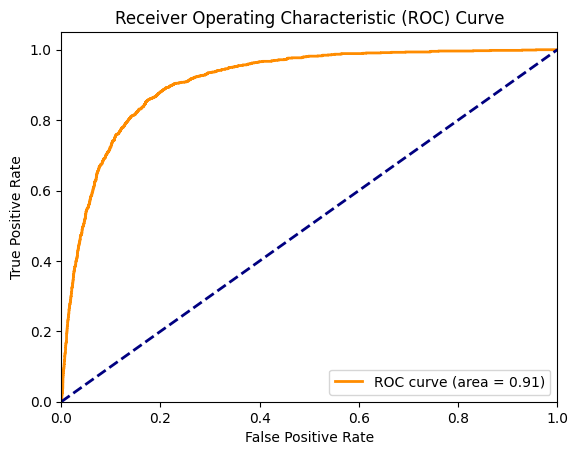

In [23]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = opt_model.predict(x_val)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [27]:
# https://www.kaggle.com/code/georgz/youden-s-j
import numpy as np

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# get the best threshold   # true positive rate = 1 - false positve rate -> J = tpr + tnr + 1 = tpr - fpr
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.174517


283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step


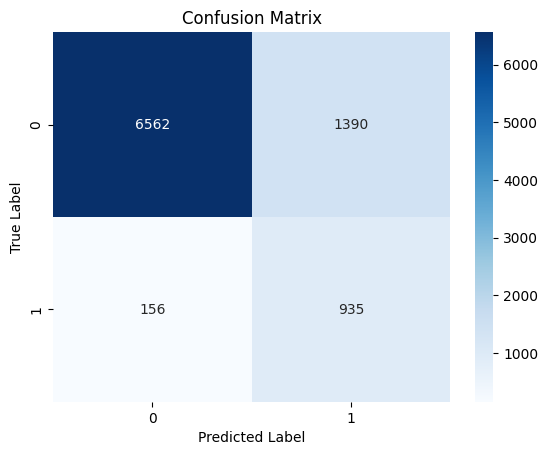

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.8973 - loss: 0.2416
Precision on the underepresented class:  0.4021505376344086
Recall on the underepresented class:  0.8570119156736938
Accuracy:  0.9016919136047363
F1-score:  0.547423887587822
              precision    recall  f1-score   support

           0       0.98      0.83      0.89      7952
           1       0.40      0.86      0.55      1091

    accuracy                           0.83      9043
   macro avg       0.69      0.84      0.72      9043
weighted avg       0.91      0.83      0.85      9043



In [28]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
threshold = best_thresh


y_pred = opt_model.predict(x_val)
y_pred_binary = (y_pred > threshold).astype(int)

precision = precision_score(y_val, y_pred_binary, pos_label=1)
recall = recall_score(y_val, y_pred_binary, pos_label = 1)
f1 = f1_score(y_val, y_pred_binary, pos_label = 1)

# Assuming y_val contains binary labels (0 and 1)
conf_matrix = confusion_matrix(y_val, y_pred_binary)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

val_loss, val_accuracy = opt_model.evaluate(x_val, y_val)



print("Precision on the underepresented class: ", precision)
print("Recall on the underepresented class: ", recall)
print("Accuracy: ", val_accuracy)
print("F1-score: ", f1)

print(classification_report(y_val,y_pred_binary))

We choose this threshold thinking that the marketing agency wants to maximizise the recall in order to know where to which clients spending resources is worth it